In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import glob
import os

In [ ]:
# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Указываем пути
path_train = '/content/drive/MyDrive/ML/05 - Доступно участникам/Кейс-1. Кредитный скоринг юридических лиц/train'
path_test = '/content/drive/MyDrive/ML/05 - Доступно участникам/Кейс-1. Кредитный скоринг юридических лиц/test'

In [ ]:
# Загружаем тренировочные данные
filenames_train = glob.glob(os.path.join(path_train, "train_*.csv"))
data_files_train = [pd.read_csv(filename) for filename in filenames_train]
data_train = pd.concat(data_files_train, ignore_index=True)
print('Размер тренировочных данных:', data_train.shape)

Размер тренировочных данных: (38731, 421)


In [ ]:
# Загружаем тестовые данные
filenames_test = glob.glob(os.path.join(path_test, "test_*.csv"))
data_files_test = [pd.read_csv(filename) for filename in filenames_test]
data_test = pd.concat(data_files_test, ignore_index=True)
print('Размер тестовых данных:', data_test.shape)

Размер тестовых данных: (19826, 420)


In [ ]:
# Просмотр первых нескольких строк
display(data_train.head())

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
0,0,train,0,0.468142,-1.045346,0.0,0.384487,0.435121,-1.178548,0.124543,...,-0.361507,-1.026853,0.0,1.418600,-0.929668,1.284014,0.731842,0.801786,-0.728297,-0.412095
1,0,train,1,-0.760983,0.515132,0.0,-1.673905,-0.393862,-1.584207,-0.439778,...,-0.546275,-1.489542,0.0,-0.622007,-0.473156,0.780020,0.648577,0.646100,-0.789362,0.083349
2,0,train,2,1.658855,0.915052,0.0,-0.581082,0.477199,-0.622226,0.390642,...,-0.485999,0.586012,0.0,0.361481,-0.364566,-1.318596,-0.385155,0.140133,0.123245,-0.670030
3,0,train,3,-0.638854,0.314099,0.0,0.000919,1.102342,-0.807371,0.329158,...,0.321985,-0.075827,0.0,-1.629672,0.876864,0.411271,0.433440,0.997364,2.829590,-1.275588
4,0,train,4,-1.091376,0.859811,0.0,-0.505439,1.665086,-0.912464,-0.332054,...,0.828886,0.140387,0.0,-0.624304,-2.197691,-1.479267,-0.465917,-0.014757,-0.320434,-0.511896


In [ ]:
# Проверка пропущенных значений в тренировочнои и тестовом датасете

missing_values_train = data_train.isnull().sum().sum()
print(f'Количество пропущенных значений в тренировочном датасете: {missing_values_train}')

missing_values_test = data_test.isnull().sum().sum()
print(f'Количество пропущенных значений в тестовом датасете: {missing_values_test}')

Количество пропущенных значений в тренировочном датасете: 0
Количество пропущенных значений в тестовом датасете: 0


In [ ]:
# Распределение классов
target_counts = data_train['target'].value_counts(normalize=True)
print('Распределение классов в целевой переменной:')
print(target_counts)

Распределение классов в целевой переменной:
target
0    0.978234
1    0.021766
Name: proportion, dtype: float64


In [ ]:
print('Типы данных в тренировочном датасете:')
print(data_train.dtypes.value_counts())

Типы данных в тренировочном датасете:
float64    418
int64        2
object       1
Name: count, dtype: int64


In [ ]:
# Исключаем нечисловые столбцы
numeric_features = data_train.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
# Описательные статистики
data_train[numeric_features].describe()

,target,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
count,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,...,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000,38731.000000
mean,0.021766,19365.000000,-0.011868,-0.022720,0.240066,0.014769,0.002543,-0.121256,-0.021874,-0.212568,...,0.007855,-0.289571,0.046371,-0.011372,-0.045371,-0.009627,0.010300,-0.019660,-0.007003,-0.026602
std,0.145919,11180.820975,0.992397,0.991483,0.427129,1.006943,1.008098,0.983779,0.979137,0.935391,...,0.994804,0.806576,0.250005,0.998106,0.978557,0.972842,1.006719,0.990136,1.004295,0.987498
min,0.000000,0.000000,-5.199338,-5.199338,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-3.232688,-5.199338,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-3.408886,-5.199338,-5.199338
25%,0.000000,9682.500000,-0.681368,-0.693879,0.000000,-0.667434,-0.684292,-0.777239,-0.671211,-0.833827,...,-0.671584,-0.816589,0.000000,-0.694098,-0.700684,-0.676811,-0.676359,-0.687918,-0.678918,-0.692241
50%,0.000000,19365.000000,-0.014384,-0.014327,0.000000,0.025820,0.005269,-0.166902,-0.021997,-0.207170,...,0.017161,-0.216972,0.000000,-0.016165,-0.035410,-0.000174,0.020541,-0.018817,-0.012701,-0.030068
75%,0.000000,29047.500000,0.658456,0.651838,0.000000,0.706342,0.682534,0.566233,0.637608,0.407831,...,0.681021,0.320220,0.000000,0.667831,0.629747,0.645590,0.694864,0.655448,0.666673,0.657315
max,1.000000,38730.000000,5.199338,5.199338,1.000000,5.199338,5.199338,2.722168,5.199338,5.199338,...,5.199338,1.395742,2.000000,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,3.585167


In [ ]:
# Вычисление корреляционной матрицы
corr_matrix = data_train[numeric_features].corr().abs()

In [ ]:
# Создание маски для верхнего треугольника матрицы корреляций
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [ ]:
# Поиск признаков с корреляцией выше порога (например, 0.95)
correlation_threshold = 0.95
high_corr_features = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

print(f'Количество признаков с корреляцией выше {correlation_threshold}: {len(high_corr_features)}')

Количество признаков с корреляцией выше 0.95: 5


In [ ]:
# Определение порога дисперсии
variance_threshold = 0.01

# Удаление высоко коррелированных признаков из тренировочного и тестового датасетов
data_train_reduced = data_train.drop(columns=high_corr_features)
data_test_reduced = data_test.drop(columns=high_corr_features)

In [ ]:
# Обновление списка числовых признаков после удаления коррелированных признаков
numeric_features = data_train_reduced.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
# Удаляем целевую переменную 'target' из списка признаков, если она присутствует
if 'target' in numeric_features:
    numeric_features.remove('target')

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Применение VarianceThreshold
selector = VarianceThreshold(threshold=variance_threshold)
selector.fit(data_train_reduced[numeric_features])

VarianceThreshold(threshold=0.01)

In [ ]:
# Получение списка признаков с высокой дисперсией
high_variance_features = data_train_reduced[numeric_features].columns[selector.get_support()]

In [ ]:
print(f'Количество признаков после удаления низковариативных: {len(high_variance_features)}')

Количество признаков после удаления низковариативных: 414


In [ ]:
# Подготовка данных
X = data_train.drop(['target', 'id', 'smpl'], axis=1)
y = data_train['target']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Обучение RandomForest для оценки важности признаков
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
rf_clf.fit(X, y)

# Получение важности признаков
importances = rf_clf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

# Сортировка признаков по важности
feature_importances_sorted = feature_importances.sort_values(ascending=False)

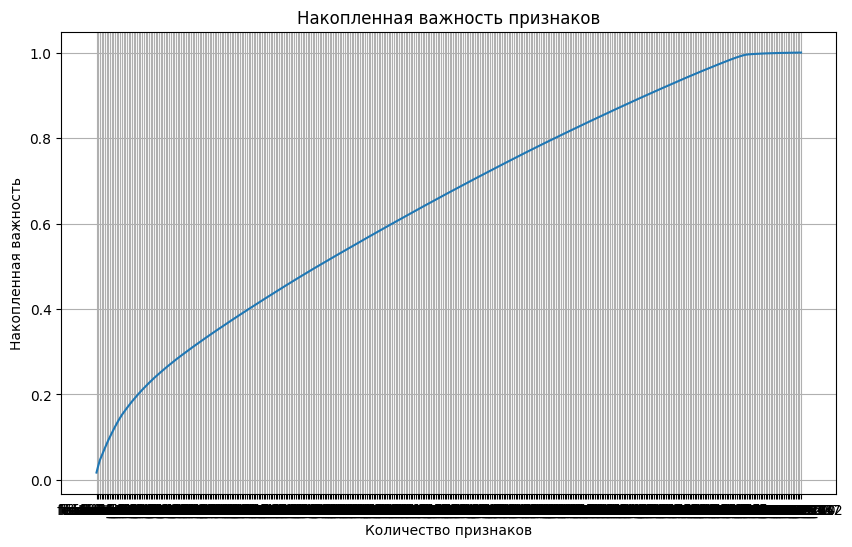

In [ ]:
import matplotlib.pyplot as plt

# Расчет накопленной важности
cumulative_importance = feature_importances_sorted.cumsum()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(cumulative_importance)
plt.title('Накопленная важность признаков')
plt.xlabel('Количество признаков')
plt.ylabel('Накопленная важность')
plt.grid(True)
plt.show()

In [ ]:
# Выбор топ-70 признаков
N = 70
selected_features = feature_importances_sorted.index[:N].tolist()

print(f'Отобрано {N} наиболее важных признаков:')
print(selected_features)

Отобрано 70 наиболее важных признаков:
['feature_51', 'feature_167', 'feature_256', 'feature_278', 'feature_296', 'feature_354', 'feature_104', 'feature_366', 'feature_67', 'feature_358', 'feature_277', 'feature_7', 'feature_58', 'feature_83', 'feature_324', 'feature_100', 'feature_11', 'feature_309', 'feature_82', 'feature_290', 'feature_61', 'feature_52', 'feature_74', 'feature_37', 'feature_215', 'feature_321', 'feature_276', 'feature_94', 'feature_19', 'feature_45', 'feature_300', 'feature_191', 'feature_391', 'feature_118', 'feature_16', 'feature_63', 'feature_347', 'feature_415', 'feature_236', 'feature_371', 'feature_340', 'feature_263', 'feature_79', 'feature_158', 'feature_258', 'feature_124', 'feature_49', 'feature_380', 'feature_328', 'feature_65', 'feature_389', 'feature_43', 'feature_90', 'feature_120', 'feature_26', 'feature_117', 'feature_327', 'feature_387', 'feature_222', 'feature_304', 'feature_169', 'feature_69', 'feature_247', 'feature_274', 'feature_4', 'feature_41

In [ ]:
# Пересечение отобранных признаков с имеющимися в data_train_reduced
available_features = [feature for feature in selected_features if feature in data_train_reduced.columns]

print(f'Количество доступных отобранных признаков: {len(available_features)}')
print('Доступные отобранные признаки:', available_features)

# Финальные данные для обучения и тестирования
X_train = data_train_reduced[available_features]
y_train = data_train_reduced['target']
X_test = data_test_reduced[available_features]

Количество доступных отобранных признаков: 69
Доступные отобранные признаки: ['feature_51', 'feature_167', 'feature_256', 'feature_278', 'feature_296', 'feature_354', 'feature_104', 'feature_366', 'feature_67', 'feature_358', 'feature_277', 'feature_7', 'feature_58', 'feature_83', 'feature_324', 'feature_100', 'feature_11', 'feature_309', 'feature_82', 'feature_290', 'feature_61', 'feature_52', 'feature_74', 'feature_37', 'feature_215', 'feature_321', 'feature_276', 'feature_94', 'feature_19', 'feature_45', 'feature_300', 'feature_191', 'feature_391', 'feature_118', 'feature_16', 'feature_63', 'feature_347', 'feature_415', 'feature_236', 'feature_371', 'feature_340', 'feature_263', 'feature_79', 'feature_158', 'feature_258', 'feature_124', 'feature_49', 'feature_380', 'feature_328', 'feature_65', 'feature_389', 'feature_43', 'feature_90', 'feature_120', 'feature_26', 'feature_117', 'feature_327', 'feature_387', 'feature_222', 'feature_304', 'feature_169', 'feature_69', 'feature_247', '

In [ ]:
from sklearn.model_selection import train_test_split

X_train_part, X_val, y_train_part, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from lightgbm import early_stopping, log_evaluation

# Параметры модели LightGBM
lgb_params = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': True,
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'random_state': 42,
    'verbose': -1
}

# Создание Dataset для LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# Определяем колбэки для ранней остановки и логирования
callbacks = [
    early_stopping(stopping_rounds=50, verbose=True),
    log_evaluation(period=100)
]

# Использование lgb.cv для кросс-валидации с колбэками
cv_results = lgb.cv(
    lgb_params,
    train_data,
    num_boost_round=1000,
    nfold=5,
    stratified=True,
    shuffle=True,
    seed=42,
    callbacks=callbacks
)

# Выводим доступные ключи
print('Доступные ключи в cv_results:', cv_results.keys())

# Определяем ключ метрики
metric_key = 'auc-mean'  # Предполагаемое название ключа

if metric_key in cv_results:
    best_score = max(cv_results[metric_key])
    best_iteration = cv_results[metric_key].index(best_score) + 1
else:
    # Если ключа нет, используем первый доступный ключ
    metric_key = list(cv_results.keys())[0]
    print(f"Ключ '{metric_key}' будет использован для определения наилучшей итерации.")
    best_score = max(cv_results[metric_key])
    best_iteration = cv_results[metric_key].index(best_score) + 1

print(f'Лучший ROC-AUC: {best_score:.4f} на итерации {best_iteration}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Training until validation scores don't improve for 50 rounds
[100]	cv_agg's valid auc: 0.763448 + 0.0205623
Early stopping, best iteration is:
[59]	cv_agg's valid auc: 0.768823 + 0.0204118
Доступные ключи в cv_results: dict_keys(['valid auc-mean', 'valid auc-stdv'])
Ключ 'valid auc-mean' будет использован для определения наилучшей итерации.
Лучший ROC-AUC: 0.7688 на итерации 59


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Определение пространства гиперпараметров
param_dist = {
    'num_leaves': [20, 31, 40],
    'max_depth': [6, 8, 10, -1],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Инициализация модели LightGBM
lgb_estimator = lgb.LGBMClassifier(
    objective='binary',
    random_state=42
)

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_estimator,
    param_distributions=param_dist,
    n_iter=20,  # Количество случайных комбинаций параметров
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Обучение модели и поиск лучших параметров
random_search.fit(X_train, y_train)

# Лучшие параметры
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Лучшие параметры: {'subsample': 0.6, 'reg_lambda': 0.1, 'reg_alpha': 0, 'num_leaves': 40, 'n_estimators': 100, 'min_child_samples': 30, 'max_depth': 6, 'learning_rate': 0.03, 'colsample_bytree': 0.8}


In [ ]:
from lightgbm import early_stopping, log_evaluation

# Определим колбэки для ранней остановки и логирования
callbacks = [
    early_stopping(stopping_rounds=50),
    log_evaluation(period=10)
]

# Определяем финальную модель с лучшими параметрами
final_model = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    **best_params
)


# Обучаем модель
final_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='auc',
    callbacks=callbacks
)


# Оценка модели на валидационной выборке
y_val_pred = final_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print(f'ROC-AUC на валидационной выборке: {roc_auc:.4f}')

Training until validation scores don't improve for 50 rounds
[10]	valid_0's auc: 0.854838	valid_0's binary_logloss: 0.0942956
[20]	valid_0's auc: 0.871444	valid_0's binary_logloss: 0.0884699
[30]	valid_0's auc: 0.89459	valid_0's binary_logloss: 0.0840573
[40]	valid_0's auc: 0.917933	valid_0's binary_logloss: 0.0800308
[50]	valid_0's auc: 0.930257	valid_0's binary_logloss: 0.0770037
[60]	valid_0's auc: 0.940314	valid_0's binary_logloss: 0.0743027
[70]	valid_0's auc: 0.949612	valid_0's binary_logloss: 0.0717029
[80]	valid_0's auc: 0.957813	valid_0's binary_logloss: 0.0690405
[90]	valid_0's auc: 0.962574	valid_0's binary_logloss: 0.067307
[100]	valid_0's auc: 0.966735	valid_0's binary_logloss: 0.065593
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.966735	valid_0's binary_logloss: 0.065593
ROC-AUC на валидационной выборке: 0.9667


In [ ]:
# Предсказание на тестовых данных
y_test_pred_proba = final_model.predict_proba(X_test)[:, 1]

In [ ]:
#Формируем итоговый DataFrame для отправки
submission = pd.DataFrame({
    'id': data_test_reduced['id'],
    'target': y_test_pred_proba
})

# Проверяем количество строк
print('Количество строк в тестовом наборе данных:', data_test_reduced.shape[0])
print('Количество строк в файле submission.csv:', submission.shape[0])

# Проверяем соответствие идентификаторов
ids_test = data_test_reduced['id'].reset_index(drop=True)
ids_submission = submission['id'].reset_index(drop=True)

if ids_test.equals(ids_submission):
    print('Идентификаторы совпадают и в том же порядке.')
else:
    print('Идентификаторы не совпадают или находятся в разном порядке.')

# Сохраняем результат в CSV файл
submission.to_csv('solution.csv', index=False)
print('Файл solution.csv сохранен.')

Количество строк в тестовом наборе данных: 19826
Количество строк в файле submission.csv: 19826
Идентификаторы совпадают и в том же порядке.
Файл solution.csv сохранен.
